## Project by; Nicole Muswanya

## Library Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from mlxtend.plotting import plot_decision_regions

In [2]:
os.getcwd()

'C:\\Users\\NICOLE\\Documents\\PCS'

### Guiding the os to find the dataset in the correct location.
#### (**If running it on your personal computer, please change the path accordingly)

In [7]:
os.chdir('C:/Users/NICOLE/Documents/PCS')

## Import Dataset

In [8]:
cardioData = pd.read_csv('cardiovascular data.csv')

## Data Overview

In [9]:
print('There are', cardioData.shape[0], 'rows of data and', cardioData.shape[1], 'features.')

There are 70000 rows of data and 13 features.


In [10]:
cardioData.columns

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

In [11]:
cardioData.head(10)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
5,8,21914,1,151,67.0,120,80,2,2,0,0,0,0
6,9,22113,1,157,93.0,130,80,3,1,0,0,1,0
7,12,22584,2,178,95.0,130,90,3,3,0,0,1,1
8,13,17668,1,158,71.0,110,70,1,1,0,0,1,0
9,14,19834,1,164,68.0,110,60,1,1,0,0,0,0


In [12]:
cardioData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [13]:
cardioData.describe().T

,count,mean,std,min,25%,50%,75%,max
id,70000.0,49972.419900,28851.302323,0.0,25006.75,50001.5,74889.25,99999.0
age,70000.0,19468.865814,2467.251667,10798.0,17664.00,19703.0,21327.00,23713.0
gender,70000.0,1.349571,0.476838,1.0,1.00,1.0,2.00,2.0
height,70000.0,164.359229,8.210126,55.0,159.00,165.0,170.00,250.0
weight,70000.0,74.205690,14.395757,10.0,65.00,72.0,82.00,200.0
ap_hi,70000.0,128.817286,154.011419,-150.0,120.00,120.0,140.00,16020.0
ap_lo,70000.0,96.630414,188.472530,-70.0,80.00,80.0,90.00,11000.0
cholesterol,70000.0,1.366871,0.680250,1.0,1.00,1.0,2.00,3.0
gluc,70000.0,1.226457,0.572270,1.0,1.00,1.0,1.00,3.0
smoke,70000.0,0.088129,0.283484,0.0,0.00,0.0,0.00,1.0


In [14]:
cardioData.cardio.value_counts()

0    35021
1    34979
Name: cardio, dtype: int64

In [15]:
(cardioData.cardio.value_counts()/70000)*100

0    50.03
1    49.97
Name: cardio, dtype: float64

In [16]:
cardioData['gender'].value_counts()

1    45530
2    24470
Name: gender, dtype: int64

In [17]:
(cardioData.gender.value_counts()/70000)*100

1    65.042857
2    34.957143
Name: gender, dtype: float64

## Information on data
### Cardiovascular diseases (CVDs) are a group of disorders of the heart and blood vessels
#### Data Content
- 70000 rows by 13 columns
- Almost an equal distribution of patients with and without a Cardiovascular Disease (CDV)
- Features: 
    - 6 continuous (id, age, height, weight, ap_hi, ap_lo)
    - 7 categorical (gender, cholesterol, glucose, smoking, alcohol, active, cardio) 
    
#### Feature description
- Objective features
    - age : in days | int
    - gender : 1-female 2-male | categorical code
    - height : in cm | int
    - weight : in kg | float
- Examination features
    - ap_hi : Systolic blood pressure | int
    - ap_lo : Diastolic blood pressure | int
    - glucose : 1: normal, 2: above normal, 3: well above normal | categorical code
    - cholesterol : 1: normal, 2: above normal, 3: well above normal | categorical code
- Subjective features
    - smoke : Do they smoke? | binary
    - alcohol : Alcohol Intake | binary
    - active : Physical Activity | binary
- Target feature
    - cardio : Presence or absence of CVD | binary
    

## Data cleaning and transformation

#### Checking for nulls, duplicates, dropping id column and renaming columns

In [18]:
# check for missing values
cardioData.isna().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [19]:
# id column is unnecessary, thus I will drop it
cardioData.drop('id', axis=1, inplace=True)

In [20]:
# check for duplicate values
cardioData.duplicated().sum()

24

In [21]:
# drop duplicate values
cardioData.drop_duplicates(inplace=True)

In [22]:
# change feature names for a better descriptive dataset
rename = {'ap_hi' : 'systolic', 
          'ap_lo' : 'diastolic', 
          'gluc' : 'glucose', 
          'alco': 'alcohol intake', 
          'cardio': 'CVD',
          'active': 'physical activity'
         }

cardioData = cardioData.rename(columns = rename)

In [23]:
cardioData.head(10)

,age,gender,height,weight,systolic,diastolic,cholesterol,glucose,smoke,alcohol intake,physical activity,CVD
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0
5,21914,1,151,67.0,120,80,2,2,0,0,0,0
6,22113,1,157,93.0,130,80,3,1,0,0,1,0
7,22584,2,178,95.0,130,90,3,3,0,0,1,1
8,17668,1,158,71.0,110,70,1,1,0,0,1,0
9,19834,1,164,68.0,110,60,1,1,0,0,0,0


In [24]:
# Confirm duplicate values have been dropped
cardioData.shape

(69976, 12)

In [25]:
# change age in days into age in years
cardioData['age'] = cardioData['age']//365

In [26]:
# make 1=Female, 2=Male
cardioData['gender'].replace(1, 'Female', inplace=True)
cardioData['gender'].replace(2, 'Male', inplace=True)

In [27]:
cardioData.head(10)

,age,gender,height,weight,systolic,diastolic,cholesterol,glucose,smoke,alcohol intake,physical activity,CVD
0,50,Male,168,62.0,110,80,1,1,0,0,1,0
1,55,Female,156,85.0,140,90,3,1,0,0,1,1
2,51,Female,165,64.0,130,70,3,1,0,0,0,1
3,48,Male,169,82.0,150,100,1,1,0,0,1,1
4,47,Female,156,56.0,100,60,1,1,0,0,0,0
5,60,Female,151,67.0,120,80,2,2,0,0,0,0
6,60,Female,157,93.0,130,80,3,1,0,0,1,0
7,61,Male,178,95.0,130,90,3,3,0,0,1,1
8,48,Female,158,71.0,110,70,1,1,0,0,1,0
9,54,Female,164,68.0,110,60,1,1,0,0,0,0


#### Getting rid of Outliers
An Outlier is a data point that differs significantly from other observations.
- Systolic pressure must always be higher than diastolic pressure because blood pressure cannot be negative
- Height below 4" and above 7" are to be dropped
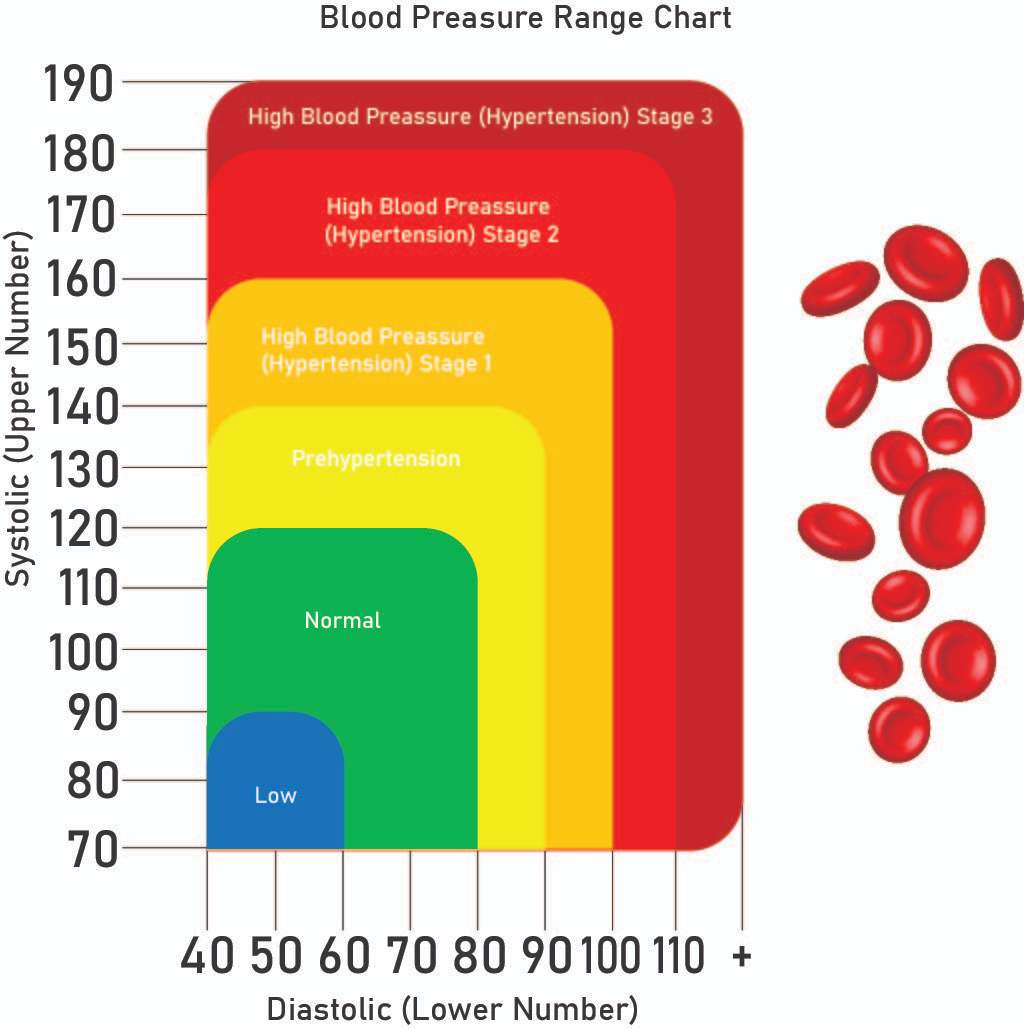

In [28]:
# find entries where systolic pressure is less than diastolic pressure and drop them

(cardioData['systolic'] < cardioData['diastolic']).value_counts()

False    68742
True      1234
dtype: int64

In [29]:
cardioData.drop(cardioData[cardioData['systolic'] < cardioData['diastolic']].index, inplace=True)

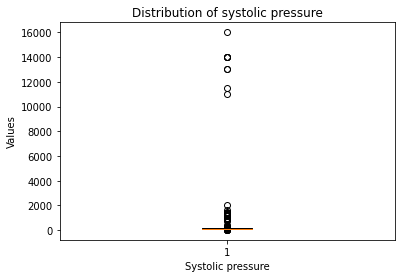

In [30]:
plt.boxplot(cardioData.systolic)
plt.title('Distribution of systolic pressure')
plt.ylabel('Values')
plt.xlabel('Systolic pressure')
plt.show()

In [31]:
# Drop systolic pressures that are below 80 and those above 220 (factor in stage 4 hypertension)
cardioData.drop(cardioData[(cardioData['systolic'] <= 80) | (cardioData['systolic'] >= 220)].index, inplace=True)

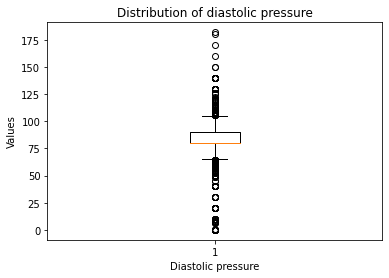

In [32]:
plt.boxplot(cardioData.diastolic)
plt.title('Distribution of diastolic pressure')
plt.ylabel('Values')
plt.xlabel('Diastolic pressure')
plt.show()

In [33]:
# Drop diastolic pressures that are below 50 and those above 140 (factor in stage 4 hypertension)
cardioData.drop(cardioData[(cardioData['diastolic'] <= 50) | (cardioData['diastolic'] >= 140)].index, inplace=True)

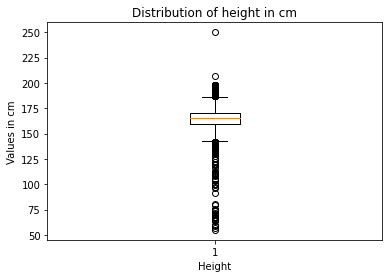

In [34]:
# height outliers
plt.boxplot(cardioData.height)
plt.title('Distribution of height in cm')
plt.ylabel('Values in cm')
plt.xlabel('Height')
plt.show()

In [35]:
# drop samples with heights below 4.5 feet and above 6.5 feet
cardioData.drop(cardioData[(cardioData['height'] <= 137) | (cardioData['height'] >= 200)].index, inplace=True)

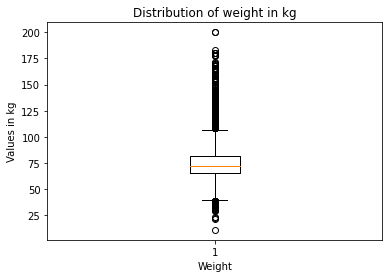

In [36]:
# weight outliers
plt.boxplot(cardioData.weight)
plt.title('Distribution of weight in kg');
plt.ylabel('Values in kg')
plt.xlabel('Weight')
plt.show()

In [37]:
cardioData.drop(cardioData[(cardioData['weight'] <= 40) | (cardioData['weight'] >= 175)].index, inplace=True)

In [38]:
cardioData.shape

(68247, 12)

## Data Exploration

#### Univariate analysis

In [39]:
cardioData.groupby('gender')['age'].agg([min, max])

,min,max
gender,,
Female,29,64
Male,29,64


In [40]:
cardioData.groupby('gender')['age'].mean()

gender
Female    52.954234
Male      52.611836
Name: age, dtype: float64

In [41]:
cardioData.groupby('gender')['weight'].agg([min, max])

,min,max
gender,,
Female,41.0,172.0
Male,41.0,171.0


In [42]:
cardioData.groupby('gender')['weight'].mean()

gender
Female    72.541222
Male      77.163463
Name: weight, dtype: float64

In [43]:
cardioData.groupby('gender')['height'].agg([min, max])

,min,max
gender,,
Female,138,198
Male,138,198


In [44]:
cardioData.groupby('gender')['height'].mean()

gender
Female    161.488609
Male      170.045624
Name: height, dtype: float64

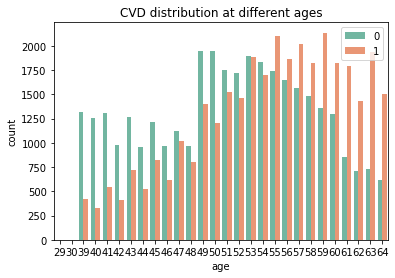

<Figure size 1440x2160 with 0 Axes>

In [45]:
# At what age does the number of people with CVD exceed the number of people without CVD?

sns.countplot(x='age', hue='CVD', data=cardioData, palette='Set2');
plt.title('CVD distribution at different ages')
plt.legend()
plt.figure(figsize=(20, 30))
plt.show()

In [46]:
cardioData['gender'].value_counts()

Female    44422
Male      23825
Name: gender, dtype: int64

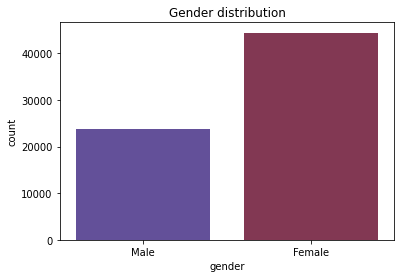

In [47]:
sns.countplot(x='gender', data=cardioData, palette='twilight');
plt.title('Gender distribution')
plt.show()

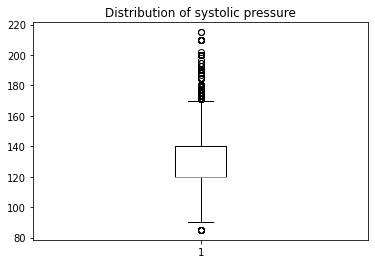

In [48]:
plt.boxplot(cardioData.systolic)
plt.title('Distribution of systolic pressure');
plt.show()

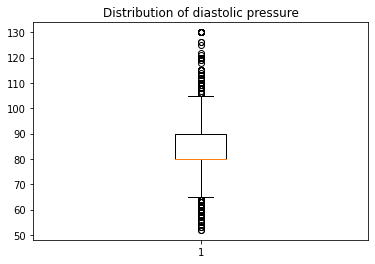

In [49]:
plt.boxplot(cardioData.diastolic)
plt.title('Distribution of diastolic pressure');
plt.show()

#### Bivariate analysis

In [50]:
cardioData.groupby('CVD')['gender'].value_counts()

CVD  gender
0    Female    22524
     Male      11923
1    Female    21898
     Male      11902
Name: gender, dtype: int64

In [51]:
cardioData['CVD'].value_counts()

0    34447
1    33800
Name: CVD, dtype: int64

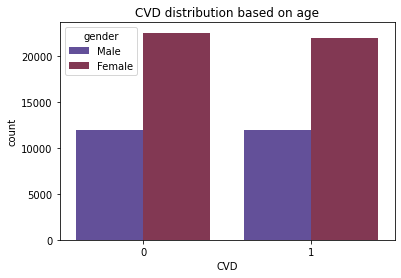

In [52]:
sns.countplot(x='CVD', hue='gender', data=cardioData, palette='twilight');
plt.title('CVD distribution based on age')
plt.show()

In [53]:
cardioData.groupby('smoke')['gender'].value_counts()

smoke  gender
0      Female    43634
       Male      18609
1      Male       5216
       Female      788
Name: gender, dtype: int64

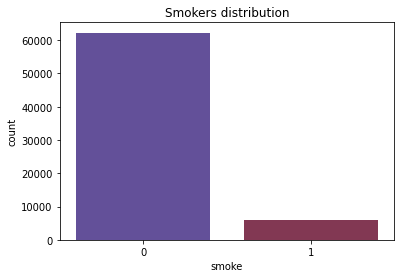

In [54]:
sns.countplot(x='smoke', data=cardioData, palette='twilight');
plt.title('Smokers distribution')
plt.show()

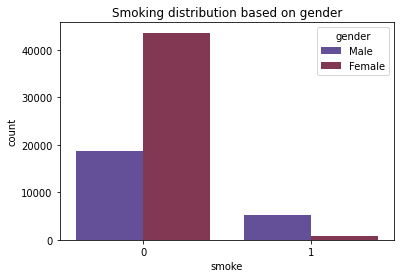

In [55]:
sns.countplot(x='smoke', hue='gender', data=cardioData, palette='twilight');
plt.title('Smoking distribution based on gender')
plt.show()

In [56]:
cardioData.groupby('alcohol intake')['gender'].value_counts()

alcohol intake  gender
0               Female    43304
                Male      21301
1               Male       2524
                Female     1118
Name: gender, dtype: int64

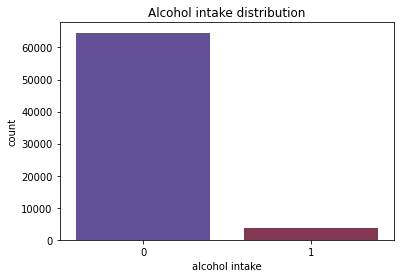

In [57]:
sns.countplot(x='alcohol intake', data=cardioData, palette='twilight');
plt.title('Alcohol intake distribution')
plt.show()

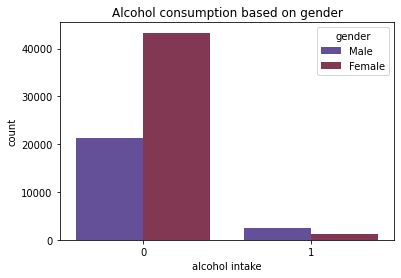

In [58]:
sns.countplot(x='alcohol intake', hue='gender', data=cardioData, palette='twilight');
plt.title('Alcohol consumption based on gender')
plt.show()

In [59]:
cardioData.groupby('physical activity')['gender'].value_counts()

physical activity  gender
0                  Female     8801
                   Male       4613
1                  Female    35621
                   Male      19212
Name: gender, dtype: int64

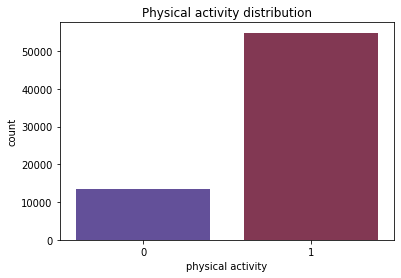

In [60]:
sns.countplot(x='physical activity', data=cardioData, palette='twilight');
plt.title('Physical activity distribution')
plt.show()

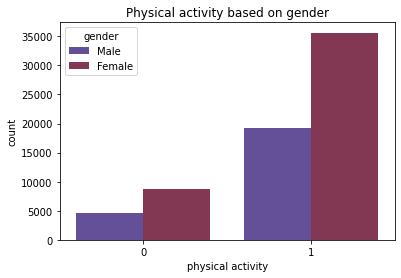

In [61]:
sns.countplot(x='physical activity', hue='gender', data=cardioData, palette='twilight');
plt.title('Physical activity based on gender')
plt.show()

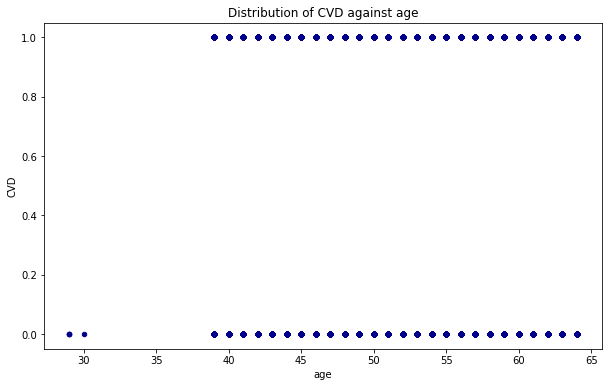

In [62]:
cardioData.plot(kind='scatter', x='age', y='CVD', figsize=(10,6), color='darkblue')

plt.title('Distribution of CVD against age')
plt.xlabel('age')
plt.ylabel('CVD')
plt.show()

#### Multivariate analysis

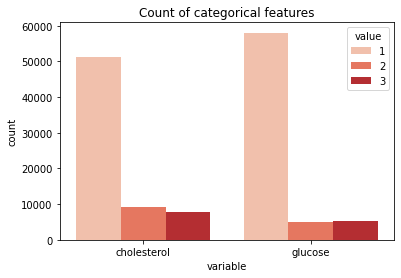

In [63]:
categorical = cardioData.loc[:,['cholesterol','glucose']]
sns.countplot(x="variable", hue="value",data= pd.melt(categorical), palette='Reds');
plt.title('Count of categorical features')
plt.show()

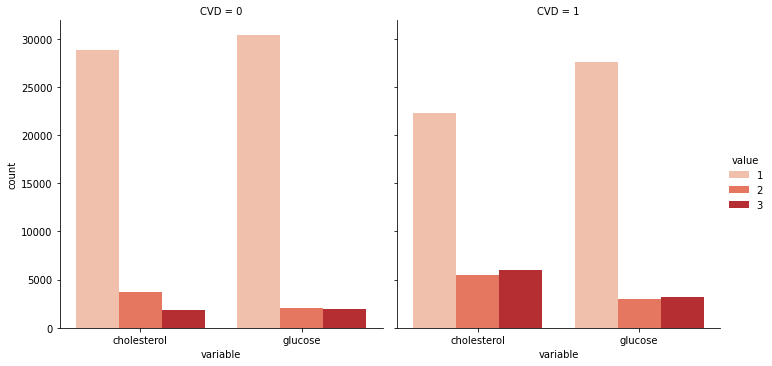

In [64]:
cat_data = pd.melt(cardioData, id_vars=['CVD'], value_vars=['cholesterol','glucose'])
sns.catplot(x="variable", hue="value", col='CVD', data= cat_data, kind='count', palette='Reds');
plt.show()

### High Blood Pressure (Hypertension)
- A condition in which the force of the blood against the artery walls is too high.

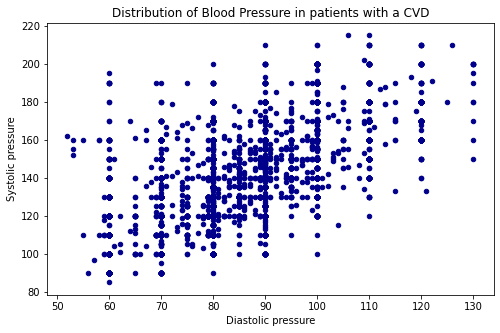

In [65]:
presentCVD = pd.DataFrame(cardioData[cardioData['CVD'] == 1])
presentCVD.plot(kind='scatter', x='diastolic', y='systolic', figsize=(8,5), color='darkblue')

plt.title('Distribution of Blood Pressure in patients with a CVD')
plt.xlabel('Diastolic pressure')
plt.ylabel('Systolic pressure')
plt.show()

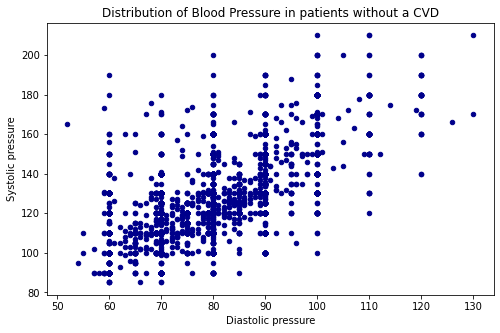

In [66]:
absentCVD = pd.DataFrame(cardioData[cardioData['CVD'] == 0])
absentCVD.plot(kind='scatter', x='diastolic', y='systolic', figsize=(8,5), color='darkblue')

plt.title('Distribution of Blood Pressure in patients without a CVD')
plt.xlabel('Diastolic pressure')
plt.ylabel('Systolic pressure')
plt.show()

## Feature Engineering

### BMI
- It is a person's weight in kilograms divided by the square of height in meters. A high BMI can be an indicator of high body fatness. BMI can be used to screen for weight categories that may lead to health problems
- Normal BMI values are said to be from 18.5 to 25.
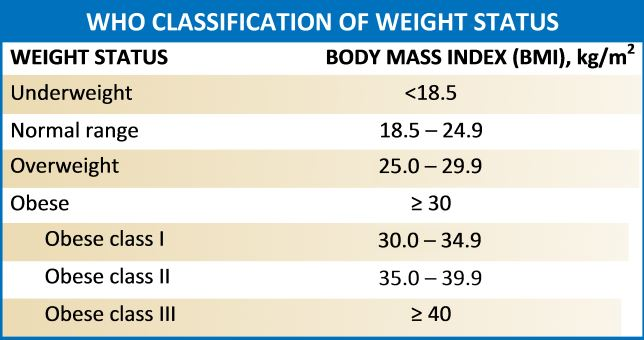

In [67]:
## Add BMI column
# evidence suggests that as BMI increases, the chance of developing cardiovascular disease

cardioData['BMI'] = round((cardioData['weight'] / ((cardioData['height']/100)**2)), 1)

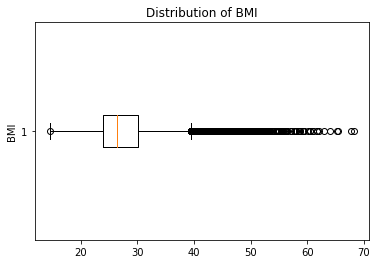

In [68]:
plt.boxplot(cardioData.BMI, vert=0)
plt.title('Distribution of BMI');
plt.ylabel("BMI")
plt.show()

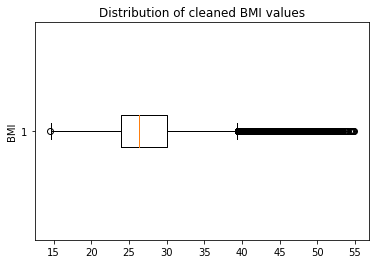

In [69]:
# Drop outliers
cardioData.drop(cardioData[(cardioData['BMI'] <= 10) | (cardioData['BMI'] >= 55)].index, inplace=True)

plt.boxplot(cardioData.BMI, vert=0)
plt.title('Distribution of cleaned BMI values');
plt.ylabel("BMI")
plt.show()

### Pulse Pressure
- Pulse pressure is the difference between systolic and diastolic blood pressure.It is measured in millimeters of mercury (mmHg). It represents the force that the heart generates each time it contracts.
- The normal range of pulse pressure is between 40 and 60 mm Hg. Pulse pressure tends to increase after the age of 50.

In [70]:
cardioData['Pulse Pressure'] = np.subtract(cardioData['systolic'], cardioData['diastolic'])

In [71]:
cardioData.head()

,age,gender,height,weight,systolic,diastolic,cholesterol,glucose,smoke,alcohol intake,physical activity,CVD,BMI,Pulse Pressure
0,50,Male,168,62.0,110,80,1,1,0,0,1,0,22.0,30
1,55,Female,156,85.0,140,90,3,1,0,0,1,1,34.9,50
2,51,Female,165,64.0,130,70,3,1,0,0,0,1,23.5,60
3,48,Male,169,82.0,150,100,1,1,0,0,1,1,28.7,50
4,47,Female,156,56.0,100,60,1,1,0,0,0,0,23.0,40


## Feature selection
- Feature Selection is one of the core concepts in machine learning which hugely impacts the performance of your model. 

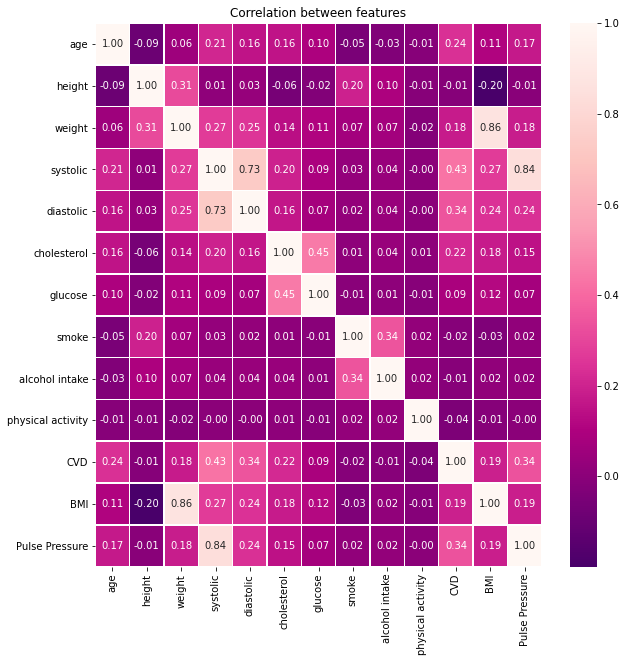

In [72]:
plt.subplots(figsize=(10,10))
sns.heatmap(cardioData.corr(), annot=True, linewidths=.5, cmap='RdPu_r', fmt='.2f')
plt.title("Correlation between features")
plt.show()
## From the heatmap, we see that systolic, diastolic and age have the highest correlation with CVD

| FEATURE | CORRELATION WITH CVD |
| :- | :- |
| Systolic | 0.43 |
| Diastolic | 0.34 |
| Pulse Pressure | 0.34 |
| Age | 0.24 |
| Cholesterol | 0.22 |

In [73]:
# Export cleaned data into a csv for use in Power BI visualisations
cardioData.to_csv(r'C:/Users/NICOLE/Documents/PCS/clean_cardiodata.csv', index=False)

In [74]:
cardioData.columns

Index(['age', 'gender', 'height', 'weight', 'systolic', 'diastolic',
       'cholesterol', 'glucose', 'smoke', 'alcohol intake',
       'physical activity', 'CVD', 'BMI', 'Pulse Pressure'],
      dtype='object')

In [75]:
# Drop irrelevant columns 
cardioData.drop(['gender','height','weight','glucose','smoke','alcohol intake','physical activity','BMI'], axis=1, inplace=True)

In [76]:
cardioData.head(5)

,age,systolic,diastolic,cholesterol,CVD,Pulse Pressure
0,50,110,80,1,0,30
1,55,140,90,3,1,50
2,51,130,70,3,1,60
3,48,150,100,1,1,50
4,47,100,60,1,0,40


In [78]:
# Export relevant data into a csv for use in Power BI visualisations
cardioData.to_csv(r'C:/Users/NICOLE/Documents/PCS/relevant_cardiodata.csv', index=False)

## Feature Scaling
- Feature Scaling is a technique to standardize the independent features present in the data in a fixed range

In [79]:
x = cardioData[['age','systolic','diastolic','cholesterol','Pulse Pressure']]
y = cardioData['CVD']

In [80]:
scaler = StandardScaler()
standard_X = scaler.fit_transform(x)

## Dataset Split

In [81]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0, shuffle=True)

## Training and testing different models

#### K-Nearest Neighbour

In [82]:
knn = KNeighborsClassifier()
knn_grid = GridSearchCV(knn, param_grid={'n_neighbors': [3, 4]}, cv=10)
knn_grid.fit(x_train, y_train)

pred = knn_grid.predict(x_test)
test_accuracy_knn = round(accuracy_score(y_test, pred) * 100, 2)
test_accuracy_knn

68.23

In [83]:
knn_f1 = round(f1_score(y_test, pred), 2)
knn_f1

0.65

#### Logisitic Regression

In [84]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

pred = logreg.predict(x_test)
test_accuarcy_log = round(accuracy_score(y_test, pred) * 100, 2)
test_accuarcy_log

72.82

In [85]:
logreg_f1 = round(f1_score(y_test, pred), 2)
logreg_f1

0.71

#### Naive Bayes

In [86]:
gaussian = GaussianNB()
gaussian.fit(x_train, y_train)

pred = gaussian.predict(x_test)
test_accuarcy_gaussian = round(accuracy_score(y_test, pred) * 100, 2)
test_accuarcy_gaussian

72.12

In [87]:
gaussian_f1 = round(f1_score(y_test, pred), 2)
gaussian_f1

0.68

#### Decision Tree

In [88]:
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

pred = dt.predict(x_test)
test_accuarcy_dt = round(accuracy_score(y_test, pred) * 100, 2)
test_accuarcy_dt

71.98

In [89]:
dt_f1 = round(f1_score(y_test, pred), 2)
dt_f1

0.7

#### Random Forest

In [90]:
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)

pred = rfc.predict(x_test)
test_accuarcy_rfc = round(accuracy_score(y_test, pred) * 100, 2)
test_accuarcy_rfc

72.33

In [91]:
rfc_f1 = round(f1_score(y_test, pred), 2)
rfc_f1

0.71

#### Support Vector Machine

In [92]:
svm = SVC()
svm.fit(x_train, y_train)

pred = svm.predict(x_test)
test_accuarcy_svm = round(accuracy_score(y_test, pred) * 100, 2)
test_accuarcy_svm

72.6

In [93]:
svm_f1 = round(f1_score(y_test, pred), 2)
svm_f1

0.69

| ALGORITHM | ACCURACY % | F1 SCORE |
| :- | - | - |
| Logistic Regression | 72.82 | 0.71 |
| SVM | 72.60 | 0.69 |
| Random Forest | 72.32 | 0.71 |
| Naive Bayes | 72.12 | 0.68 |
| Decision Tree | 71.98 | 0.70 |
| KNN | 68.23 | 0.65 |


## Hyperparameter Tuning and Evaluation

#### K-Nearest Neighbour (Elbow method with GridSearchCV)

In [94]:
# params = {'n_neighbors':list(range(1, 51)),
#           'weights':['uniform', 'distance'],
#           'p':[1,2]}

# knn = KNeighborsClassifier()
# knn_grid = GridSearchCV(knn, param_grid=params, cv=10)
# knn_grid.fit(x_train, y_train)
# print("Best hyperparameters: ", knn_grid.best_params_)

In [95]:
knn = KNeighborsClassifier(n_neighbors=46, p=2, weights='uniform')
knn.fit(x_train, y_train)

pred = knn.predict(x_test)
test_accuracy_knn = round(accuracy_score(y_test, pred) * 100, 2)
test_accuracy_knn

72.48

In [96]:
knn_f1 = round(f1_score(y_test, pred), 2)
knn_f1

0.7

##### Algorithm Evaluation

In [97]:
scores = cross_val_score(knn, x_train, y_train, cv=10)
print('KNN Model gives an average accuracy of {0:.2f} % with minimun of {1:.2f} % and maximum of {2:.2f} % accuracy'
      .format(scores.mean() * 100, scores.min() * 100, scores.max() * 100))

KNN Model gives an average accuracy of 72.58 % with minimun of 71.87 % and maximum of 73.59 % accuracy


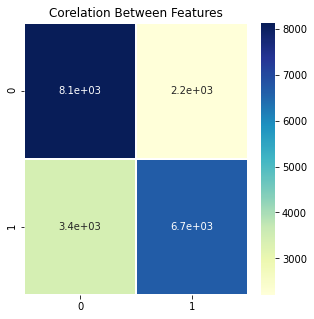

In [98]:
plt.rcParams['figure.figsize'] = (5, 5) 
sns.heatmap(confusion_matrix(y_test, pred), annot = True, linewidths=.5, cmap="YlGnBu")
plt.title('Corelation Between Features')
plt.show()

In [99]:
print('True Positive Cases : {}'.format(confusion_matrix(y_test, pred)[1][1]))
print('True Negative Cases : {}'.format(confusion_matrix(y_test, pred)[0][0]))
print('False Positive Cases : {}'.format(confusion_matrix(y_test, pred)[0][1]))
print('False Negative Cases : {}'.format(confusion_matrix(y_test, pred)[1][0]))

True Positive Cases : 6697
True Negative Cases : 8133
False Positive Cases : 2205
False Negative Cases : 3426


In [100]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.70      0.79      0.74     10338
           1       0.75      0.66      0.70     10123

    accuracy                           0.72     20461
   macro avg       0.73      0.72      0.72     20461
weighted avg       0.73      0.72      0.72     20461



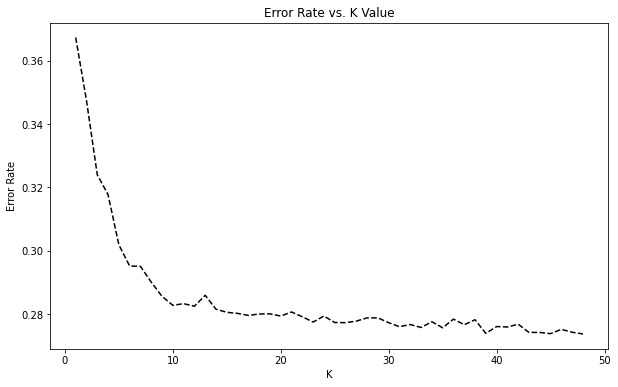

In [101]:
error_rate = []

for i in range(1,49):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,49),error_rate,color='black', linestyle='dashed', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate');

#### Random Forest (Using GridSearchCV)

In [102]:
random_forest = RandomForestClassifier()
rf = GridSearchCV(random_forest, param_grid={'n_estimators': [10, 100, 1000]}, cv=5)
rf.fit(x_train, y_train)

pred = rf.predict(x_test)
test_accuracy_rf = round(accuracy_score(y_test, pred) * 100, 2)
print(test_accuracy_rf, rf.best_params_)

72.38 {'n_estimators': 1000}


In [103]:
rf_f1 = round(f1_score(y_test, pred), 2)
rf_f1

0.71

##### Algorithm Evaluation

In [104]:
# scores = cross_val_score(rf, x_train, y_train, cv=10)
# print('Random Forest Model gives an average accuracy of {0:.2f} % with minimun of {1:.2f} % and maximum of {2:.2f} % accuracy'
#       .format(scores.mean() * 100, scores.min() * 100, scores.max() * 100))

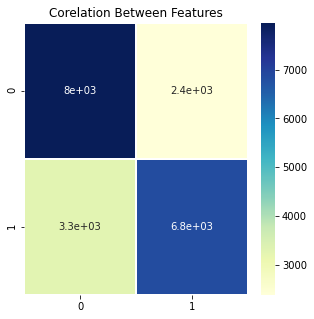

In [105]:
plt.rcParams['figure.figsize'] = (5, 5) 
sns.heatmap(confusion_matrix(y_test, pred), annot = True, linewidths=.5, cmap="YlGnBu")
plt.title('Corelation Between Features')
plt.show()

In [106]:
print('True Positive Cases : {}'.format(confusion_matrix(y_test, pred)[1][1]))
print('True Negative Cases : {}'.format(confusion_matrix(y_test, pred)[0][0]))
print('False Positive Cases : {}'.format(confusion_matrix(y_test, pred)[0][1]))
print('False Negative Cases : {}'.format(confusion_matrix(y_test, pred)[1][0]))

True Positive Cases : 6849
True Negative Cases : 7960
False Positive Cases : 2378
False Negative Cases : 3274


In [107]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.71      0.77      0.74     10338
           1       0.74      0.68      0.71     10123

    accuracy                           0.72     20461
   macro avg       0.73      0.72      0.72     20461
weighted avg       0.73      0.72      0.72     20461



#### Logistic regression (Using L1 Penalty)

In [108]:
params_for_l1 = { 
    'C' :  np.logspace(100, 10, 1),
    'solver' : ['liblinear', 'saga']
}

In [109]:
# logreg = LogisticRegression(penalty = 'l1')
# logreg_with_l1 = GridSearchCV(estimator=logreg, param_grid=params_for_l1, cv= 10, n_jobs = -1)
# logreg_with_l1.fit(x_train, y_train)
# print("Best Hyper Parameters:\n",logreg_with_l1.best_params_)

# OUTPUT:
# Best Hyper Parameters:
#  {'C': 1.0, 'solver': 'liblinear'}

In [110]:
logreg_with_l1 = LogisticRegression(penalty = 'l1', C = 1000, solver = 'liblinear')
logreg_with_l1.fit(x_train, y_train)

pred = logreg_with_l1.predict(x_test)
test_accuarcy_log_l1 = round(accuracy_score(y_test, pred) * 100, 2)
test_accuarcy_log_l1

72.82

In [111]:
logreg_l1_f1 = round(f1_score(y_test, pred), 2)
logreg_l1_f1

0.71

##### Algorithm Evaluation

In [112]:
# scores = cross_val_score(logreg_with_l1, x_train, y_train, cv=10)
# print('Logistic Regression Model gives an average accuracy of {0:.2f} % with minimun of {1:.2f} % and maximum of {2:.2f} % accuracy'
#       .format(scores.mean() * 100, scores.min() * 100, scores.max() * 100))

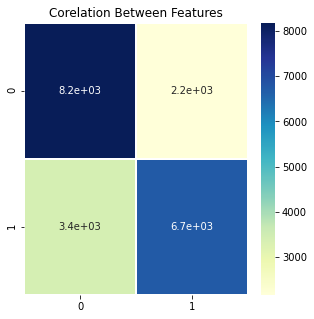

In [113]:
plt.rcParams['figure.figsize'] = (5, 5) 
sns.heatmap(confusion_matrix(y_test, pred), annot = True, linewidths=.5, cmap="YlGnBu")
plt.title('Corelation Between Features')
plt.show()

In [114]:
print('True Positive Cases : {}'.format(confusion_matrix(y_test, pred)[1][1]))
print('True Negative Cases : {}'.format(confusion_matrix(y_test, pred)[0][0]))
print('False Positive Cases : {}'.format(confusion_matrix(y_test, pred)[0][1]))
print('False Negative Cases : {}'.format(confusion_matrix(y_test, pred)[1][0]))

True Positive Cases : 6725
True Negative Cases : 8175
False Positive Cases : 2163
False Negative Cases : 3398


In [115]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.71      0.79      0.75     10338
           1       0.76      0.66      0.71     10123

    accuracy                           0.73     20461
   macro avg       0.73      0.73      0.73     20461
weighted avg       0.73      0.73      0.73     20461



#### SVM

In [ ]:
svm = SVC(kernel='rbf')
svm.fit(x_train, y_train)

pred = svm.predict(x_test)
test_accuracy_svm = round(accuracy_score(y_test, pred) * 100, 2)
test_accuracy_svm

In [ ]:
svm_f1 = round(f1_score(y_test, pred), 2)
svm_f1

##### Algorithm Evaluation

In [ ]:
# scores = cross_val_score(svm, x_train, y_train, cv=10)
# print('SVM Model gives an average accuracy of {0:.2f} % with minimun of {1:.2f} % and maximum of {2:.2f} % accuracy'
#       .format(scores.mean() * 100, scores.min() * 100, scores.max() * 100))

In [ ]:
plt.rcParams['figure.figsize'] = (5, 5) 
sns.heatmap(confusion_matrix(y_test, pred), annot = True, linewidths=.5, cmap="YlGnBu")
plt.title('Corelation Between Features')
plt.show()

In [ ]:
print('True Positive Cases : {}'.format(confusion_matrix(y_test, pred)[1][1]))
print('True Negative Cases : {}'.format(confusion_matrix(y_test, pred)[0][0]))
print('False Positive Cases : {}'.format(confusion_matrix(y_test, pred)[0][1]))
print('False Negative Cases : {}'.format(confusion_matrix(y_test, pred)[1][0]))

In [ ]:
print(classification_report(y_test, pred))